In [35]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [82]:
quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/random/cali/*.cali'))
quickTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/sorted/cali/*.cali'))
quickTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/reverse-sorted/cali/*.cali'))
quickTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/1%-perturbed/cali/*.cali'))

# quickTKCUDARandom = th.Thicket.from_caliperreader(glob('PerformanceEval/dataFiles/CUDA/QuickSort/random'))
# quickTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/sorted/cali/*.cali'))
# quickTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/reverse-sorted/cali/*.cali'))
# quickTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/1%-perturbed/cali/*.cali'))

IndexError: list index out of range

In [47]:
quickTKCUDARandom.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,
144005687,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984061,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 64, 0]",g,quicksort,CUDA,int,4,65536,Random,64,1,23,online
386313179,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984182,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 1024, 0]",g,quicksort,CUDA,int,4,65536,Random,1024,16,23,online
1277123279,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984061,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 512, 0]",g,quicksort,CUDA,int,4,65536,Random,512,8,23,online
1564232545,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984061,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 128, 0]",g,quicksort,CUDA,int,4,65536,Random,128,2,23,online
3131102049,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702002101,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 64, 0]",g,quicksort,CUDA,int,4,262144,Random,64,1,23,online
4278972204,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984061,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 256, 0]",g,quicksort,CUDA,int,4,65536,Random,256,4,23,online


In [58]:
quickMPIData = [quickTKMPIRandom, quickTKMPISorted, quickTKMPIReverse, quickTKMPIPerturbed]
quickMPIDataClean = []

for i in range(len(quickMPIData)):
    quickGB = quickMPIData[i].groupby("InputSize")

    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickMPIDataClean.append(quickCtk)

quickCUDAData = [quickTKCUDARandom, quickTKCUDASorted, quickTKCUDAReverse]
quickCUDADataClean = []

for i in range(len(quickCUDAData)):
    quickGB = quickCUDAData[i].groupby("InputSize")
    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_threads"
    )

    remove_list = [("node", "")]
    values = [2**16]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickCUDADataClean.append(quickCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17d03ae50>, 262144: <thicket.thicket.Thicket object at 0x17d576a50>, 1048576: <thicket.thicket.Thicket object at 0x291149590>, 4194304: <thicket.thicket.Thicket object at 0x291107b90>, 16777216: <thicket.thicket.Thicket object at 0x2910a9d50>, 67108864: <thicket.thicket.Thicket object at 0x291134d10>, 268435456: <thicket.thicket.Thicket object at 0x2912166d0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x29122dc10>, 262144: <thicket.thicket.Thicket object at 0x2911d7cd0>, 1048576: <thicket.thicket.Thicket object at 0x291224450>, 4194304: <thicket.thicket.Thicket object at 0x2911ad550>, 16777216: <thicket.thicket.Thicket object at 0x291293c10>, 67108864: <thicket.thicket.Thicket object at 0x29124ff90>, 268435456: <thicket.thicket.Thicket object at 0x291297c10>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2912dab10>, 262144: <thicket.thicket.Thicket object at 0x2912b2d90>, 1

Collect desired regions for plotting

In [60]:
# Data for main
quickMPIRandomMain = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'main']
quickMPISortedMain = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'main']
quickMPIReverseMain = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'main']
quickMPIPerturbedMain = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
quickMPIRandomComm = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comm']
quickMPISortedComm = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comm']
quickMPIReverseComm = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comm']
quickMPIPerturbedComm = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickMPIRandomComp = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comp_large']
quickMPISortedComp = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comp_large']
quickMPIReverseComp = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comp_large']
quickMPIPerturbedComp = quickMPIDataClean[3].dataframe.loc[quickMPIDataClean[3].dataframe['name'] == 'comp_large']

algosMain = {'quickMPIRandom': quickMPIRandomMain, 'quickMPISorted': quickMPISortedMain, 'quickMPIReverse': quickMPIReverseMain,
            'quickMPIPerturbed': quickMPIPerturbedMain}

algosComm = {'quickMPIRandom': quickMPIRandomComm, 'quickMPISorted': quickMPISortedComm, 'quickMPIReverse': quickMPIReverseComm,
            'quickMPIPerturbed': quickMPIPerturbedComm}

algosComp = {'quickMPIRandom': quickMPIRandomComp, 'quickMPISorted': quickMPISortedComp, 'quickMPIReverse': quickMPIReverseComp,
            'quickMPIPerturbed': quickMPIPerturbedComp}

# Data for main
quickCUDARandomMain = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'main']
quickCUDASortedMain = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'main']
quickCUDAReverseMain = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'main']
# quickCUDAPerturbedMain = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
quickCUDARandomComm = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comm']
quickCUDASortedComm = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comm']
quickCUDAReverseComm = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comm']
# quickCUDAPerturbedComm = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickCUDARandomComp = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comp_large']
quickCUDASortedComp = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comp_large']
quickCUDAReverseComp = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comp_large']
# quickCUDAPerturbedComp = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'quickCUDARandom': quickCUDARandomMain, 'quickCUDASorted': quickCUDASortedMain, 'quickCUDAReverse': quickCUDAReverseMain}

algosCommCUDA = {'quickCUDARandom': quickCUDARandomComm, 'quickCUDASorted': quickCUDASortedComm, 'quickCUDAReverse': quickCUDAReverseComm}

algosCompCUDA = {'quickCUDARandom': quickCUDARandomComp, 'quickCUDASorted': quickCUDASortedComp, 'quickCUDAReverse': quickCUDAReverseComp}

display(quickCUDADataClean[0].dataframe)

num_threads         65536                             262144  \
               Min time/rank Max time/rank Avg time/rank    nid   
0           64    116.356833    116.356833    116.356833      1   
1          128    117.051579    117.051579    117.051579   <NA>   
2          256    116.525746    116.525746    116.525746   <NA>   
3          512    117.805084    117.805084    117.805084   <NA>   
4         1024    118.980394    118.980394    118.980394   <NA>   
5           64      0.000520      0.000520      0.000520      3   
6          128      0.000492      0.000492      0.000492   <NA>   
7          256      0.000473      0.000473      0.000473   <NA>   
8          512      0.000639      0.000639      0.000639   <NA>   
9         1024      0.000495      0.000495      0.000495   <NA>   
10          64      0.000477      0.000477      0.000477      4   
11         128      0.000457      0.000457      0.000457   <NA>   
12         256      0.000436      0.000436      0.000436   <NA>   
13         512      0.000584      0.000584      0.000584   <NA>   
14        1024      0.000452      0.000452      0.000452   <NA>   
15          64      0.000456      0.000456      0.000456      5   
16         128      0.000436      0.000436      0.000436   <NA>   
17         256      0.000416      0.000416      0.000416   <NA>   
18         512      0.000552      0.000552      0.000552   <NA>   
19        1024      0.000433      0.000433      0.000433   <NA>   
20          64      0.001572      0.001572      0.001572      6   
21         128      0.001598      0.001598      0.001598   <NA>   
22         256      0.001550      0.001550      0.001550   <NA>   
23         512      0.003189      0.003189      0.003189   <NA>   
24        1024      0.001552      0.001552      0.001552   <NA>   
25          64      0.001557      0.001557      0.001557      7   
26         128      0.001583      0.001583      0.001583   <NA>   
27         256      0.001536      0.001536      0.001536   <NA>   
28         512      0.003158      0.003158      0.003158   <NA>   
29        1024      0.001537      0.001537      0.001537   <NA>   
30          64      0.000186      0.000186      0.000186      8   
31         128      0.000188      0.000188      0.000188   <NA>   
32         256      0.000186      0.000186      0.000186   <NA>   
33         512      0.000189      0.000189      0.000189   <NA>   
34        1024      0.000187      0.000187      0.000187   <NA>   
35          64      0.000112      0.000112      0.000112      2   
36         128      0.000115      0.000115      0.000115   <NA>   
37         256      0.000110      0.000110      0.000110   <NA>   
38         512      0.000200      0.000200      0.000200   <NA>   
39        1024      0.000125      0.000125      0.000125   <NA>   

                                                                        \
     spot.channel Min time/rank Max time/rank Avg time/rank Total time   
0   regionprofile      0.882647      0.882647      0.882647   0.882647   
1             NaN           NaN           NaN           NaN        NaN   
2             NaN           NaN           NaN           NaN        NaN   
3             NaN           NaN           NaN           NaN        NaN   
4             NaN           NaN           NaN           NaN        NaN   
5   regionprofile      0.000556      0.000556      0.000556   0.000556   
6             NaN           NaN           NaN           NaN        NaN   
7             NaN           NaN           NaN           NaN        NaN   
8             NaN           NaN           NaN           NaN        NaN   
9             NaN           NaN           NaN           NaN        NaN   
10  regionprofile      0.000533      0.000533      0.000533   0.000533   
11            NaN           NaN           NaN           NaN        NaN   
12            NaN           NaN           NaN           NaN        NaN   
13            NaN           NaN           NaN           NaN        NaN   
14  

Plot strong scaling

In [61]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

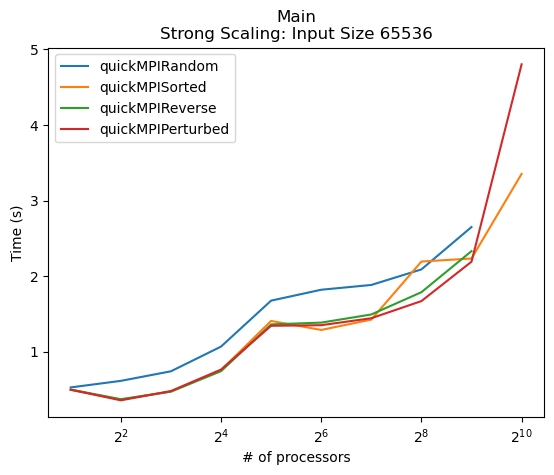

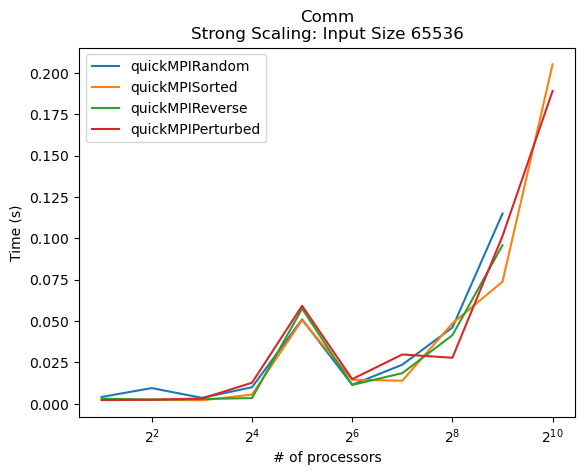

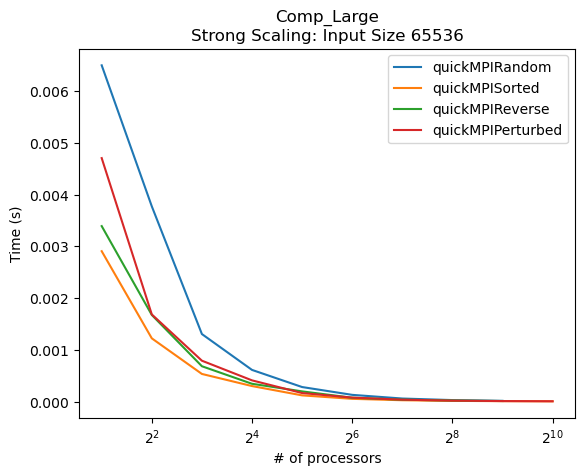

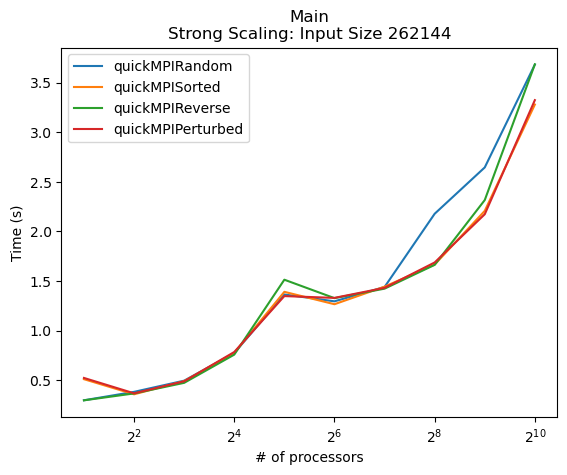

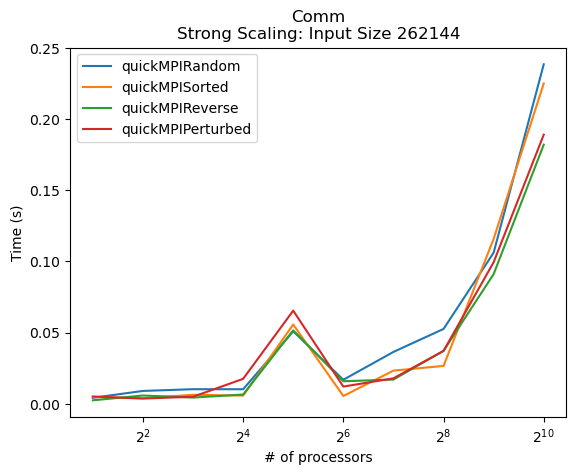

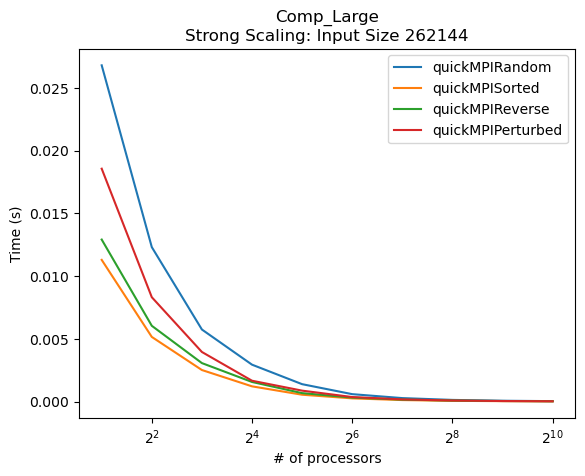

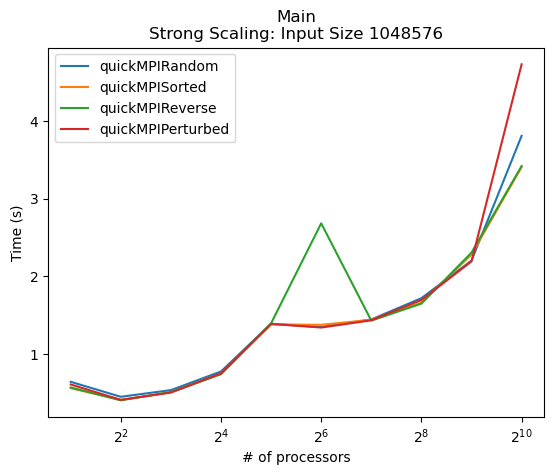

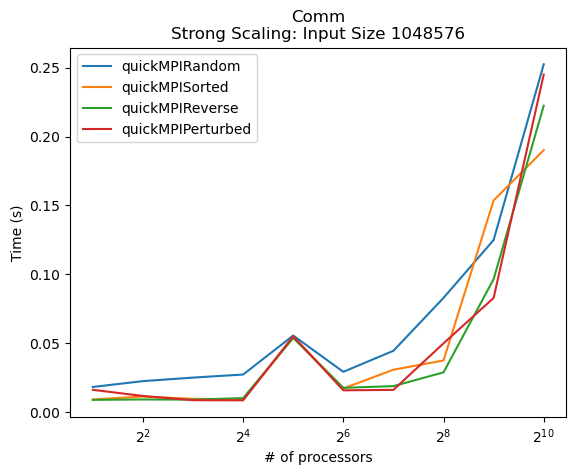

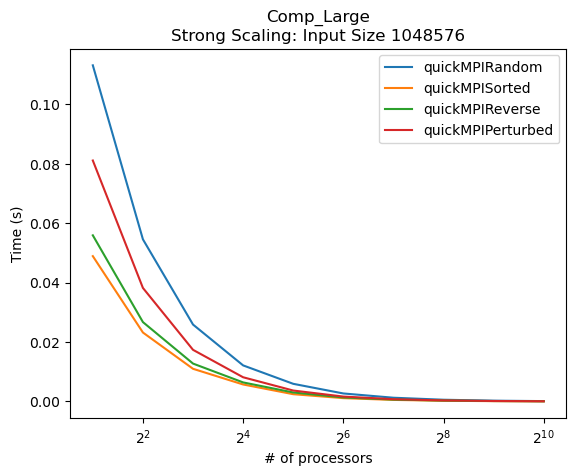

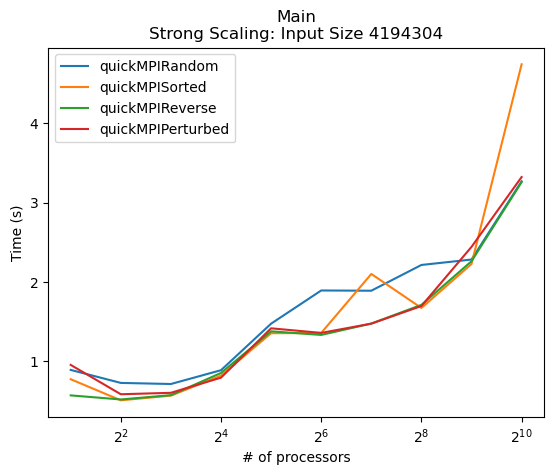

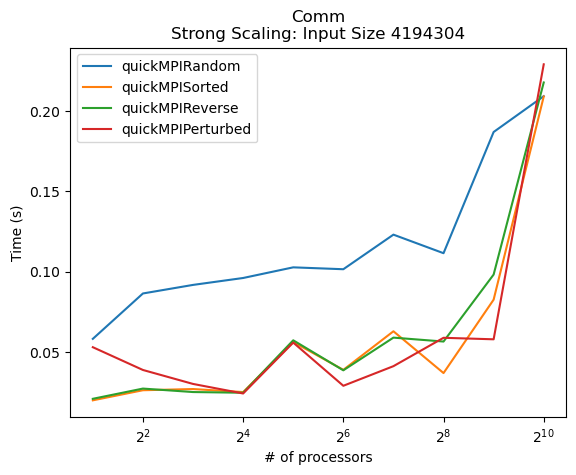

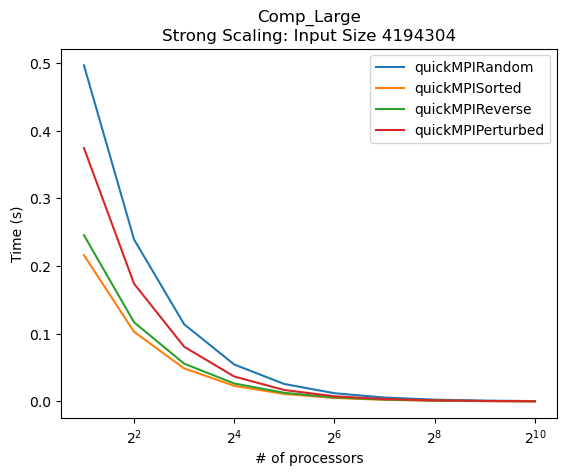

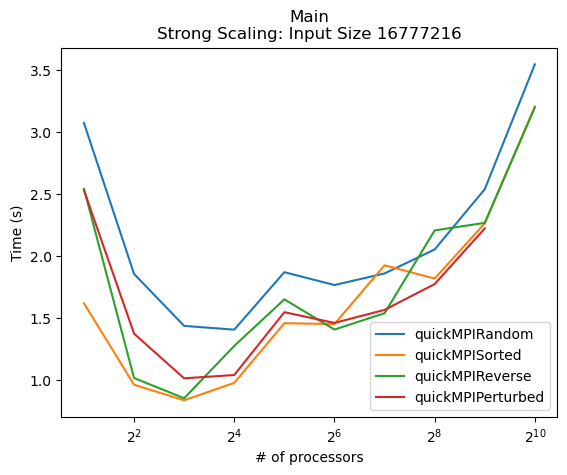

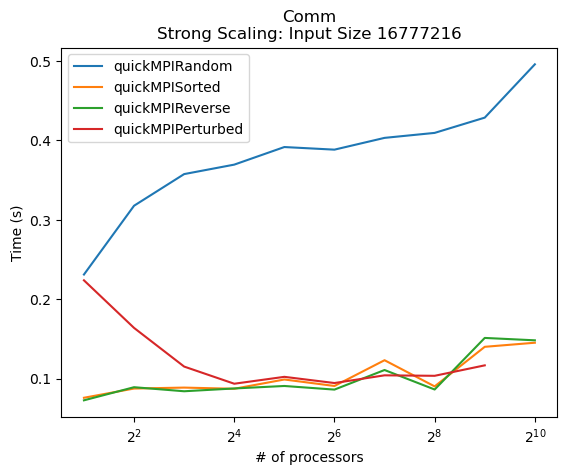

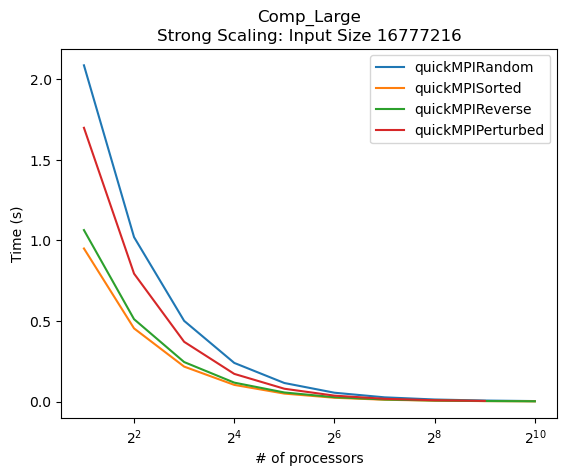

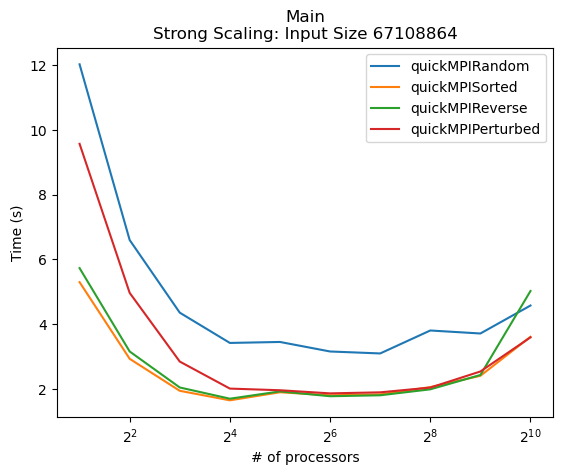

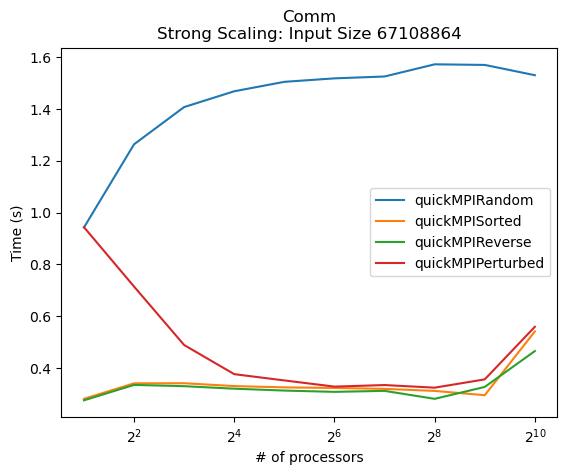

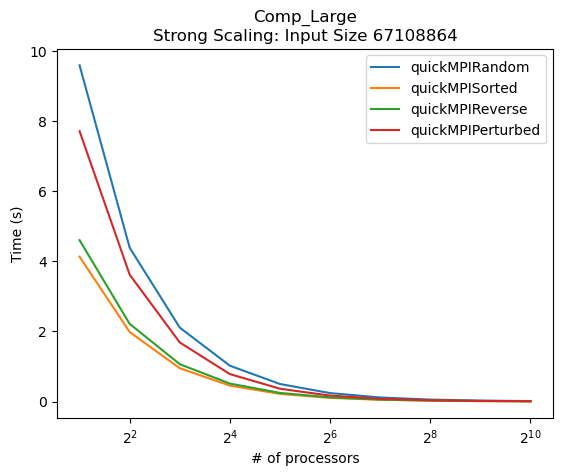

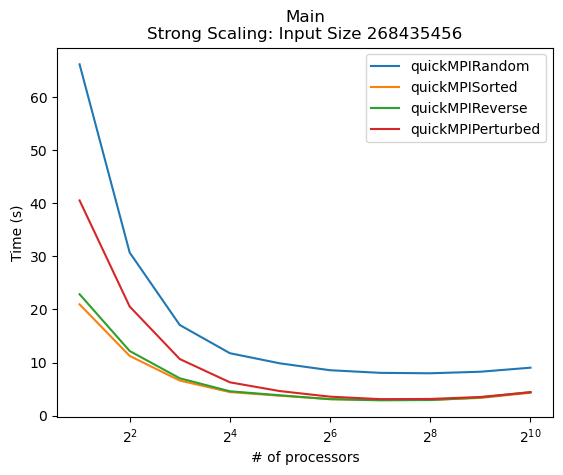

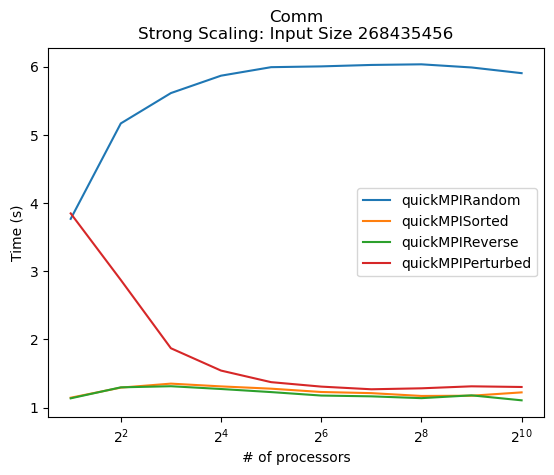

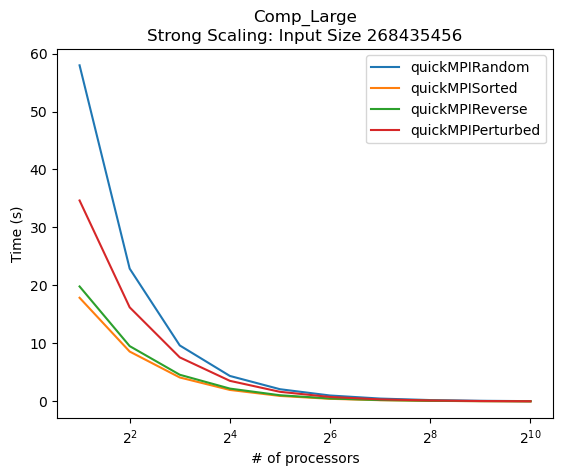

In [41]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

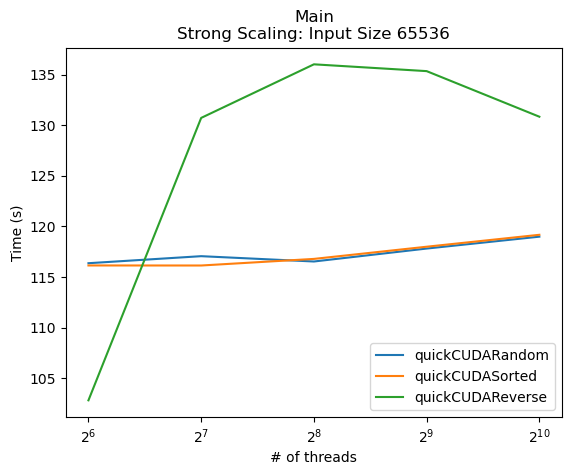

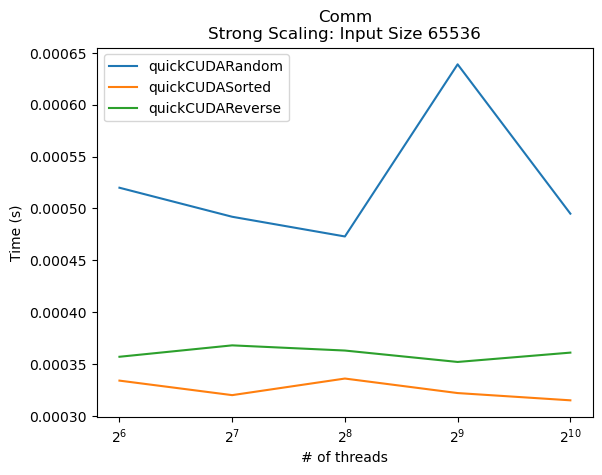

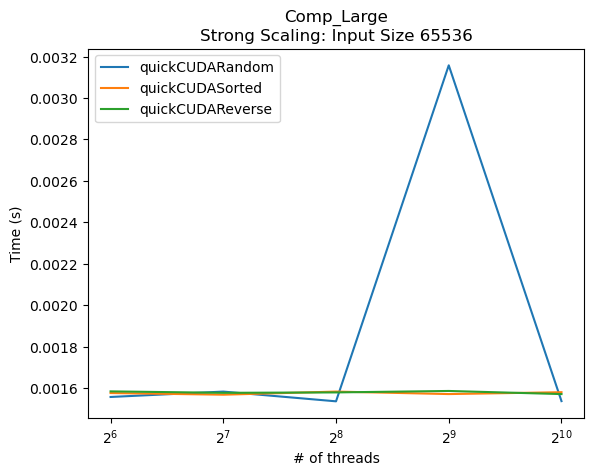

KeyError: 262144

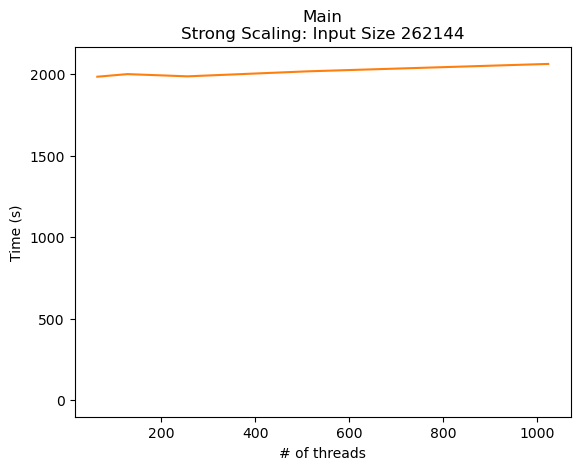

In [62]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_threads']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

values = [2**16, 2**18]
for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [50]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

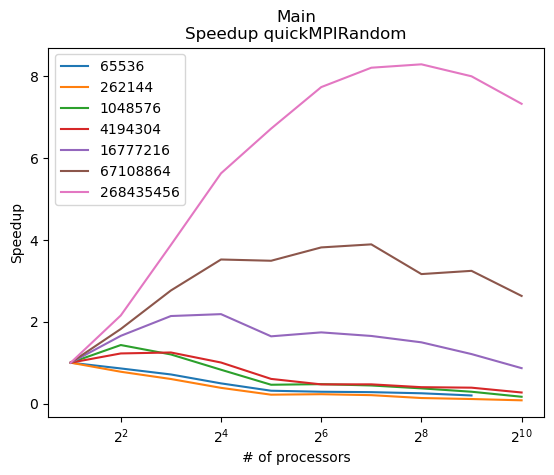

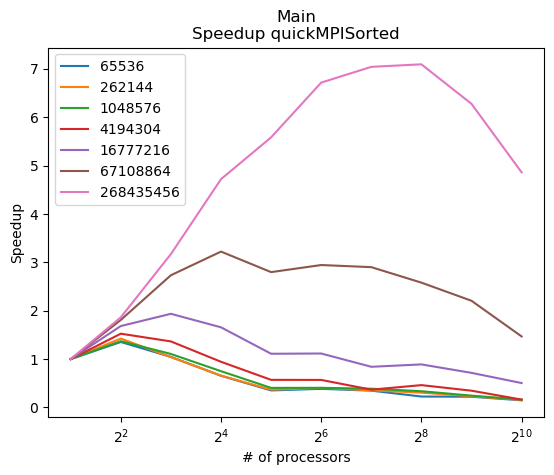

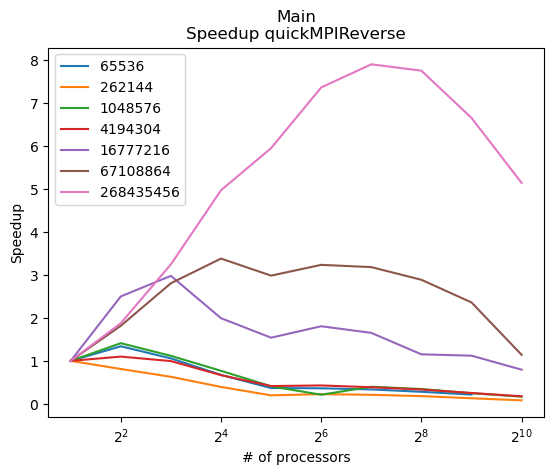

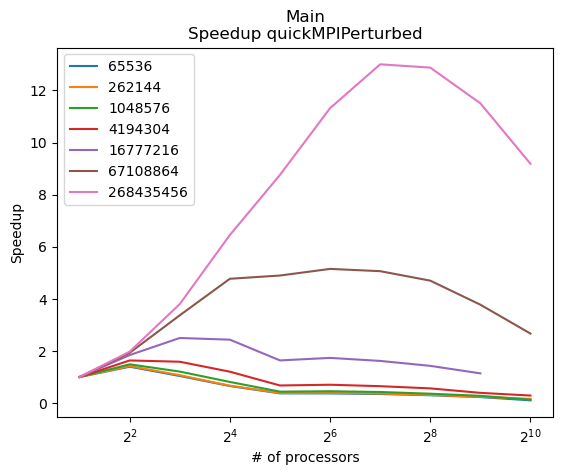

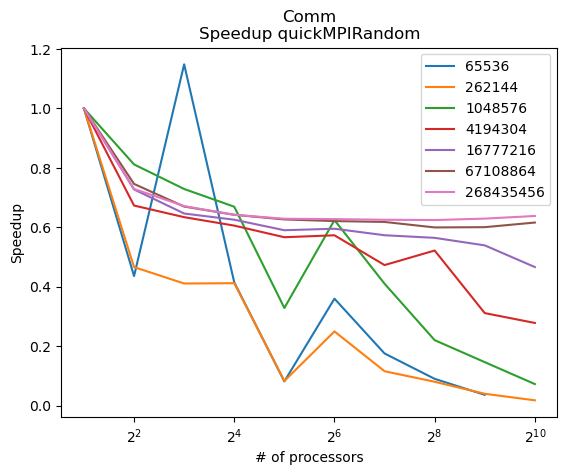

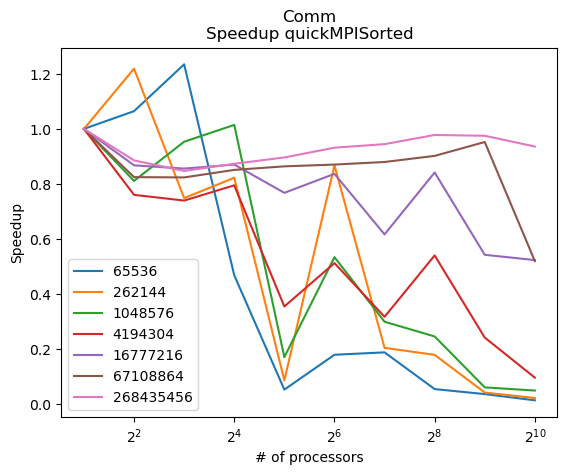

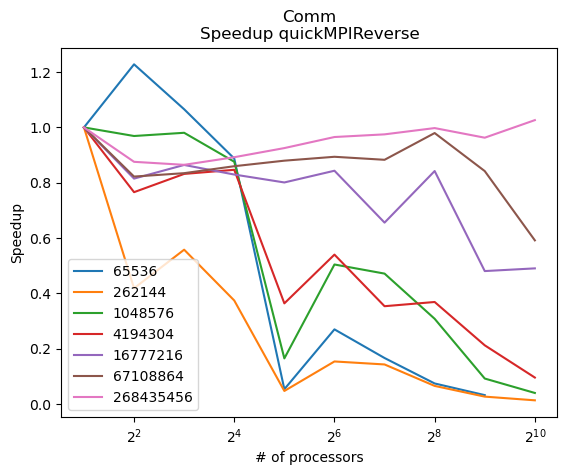

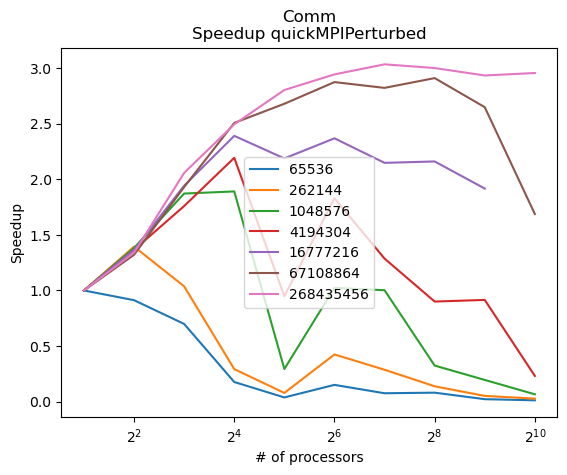

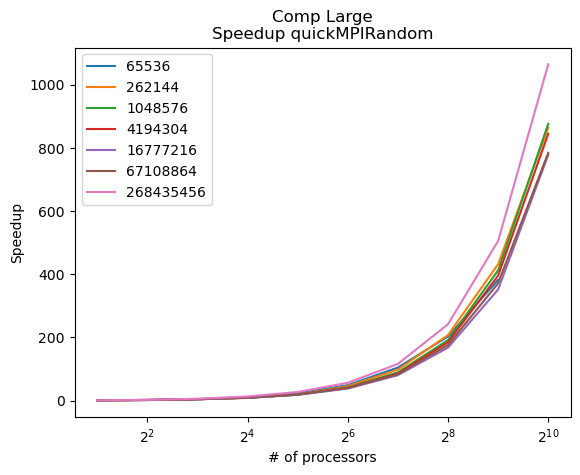

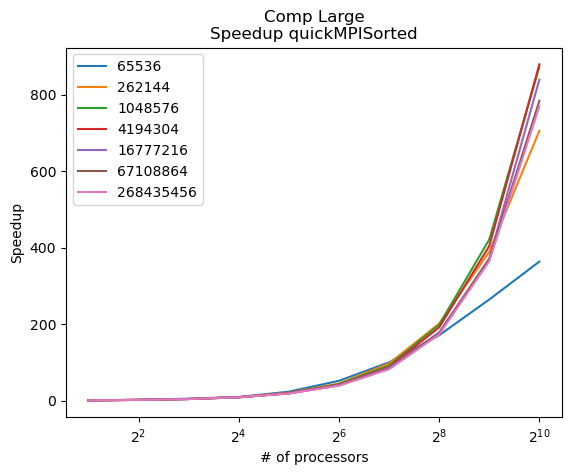

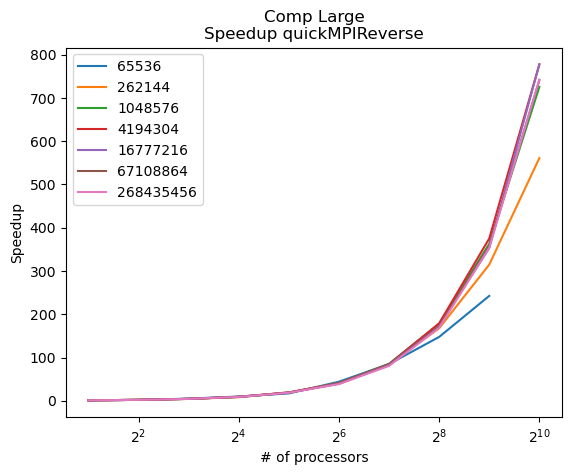

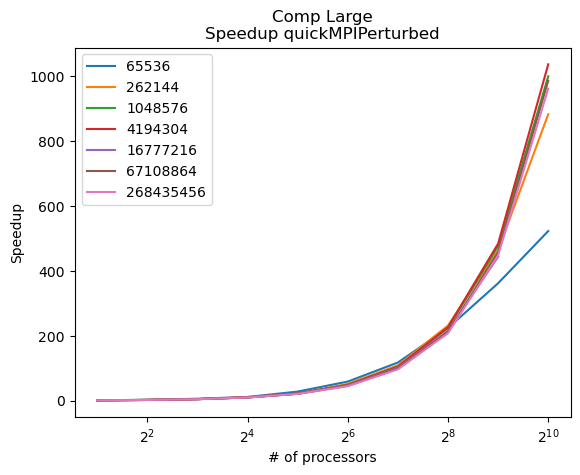

In [54]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

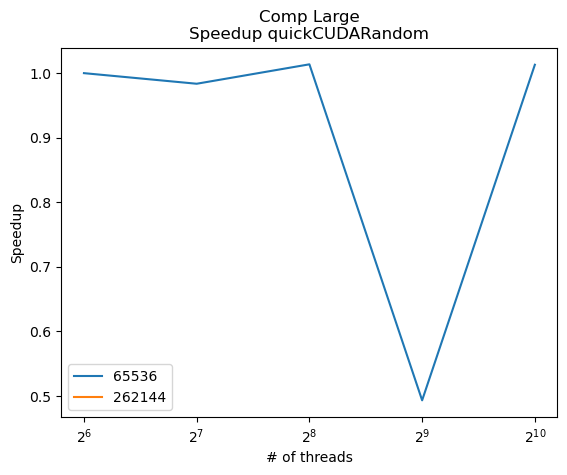

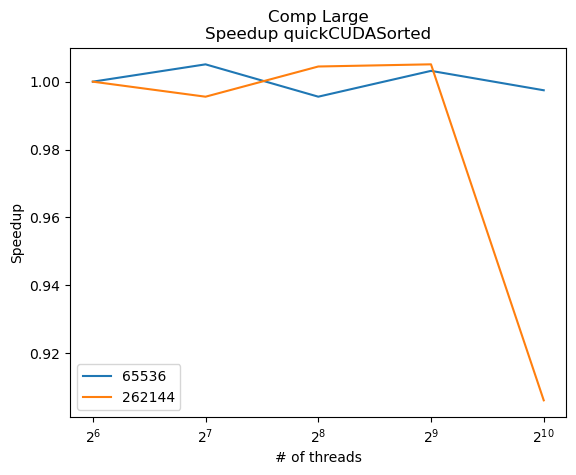

KeyError: 262144

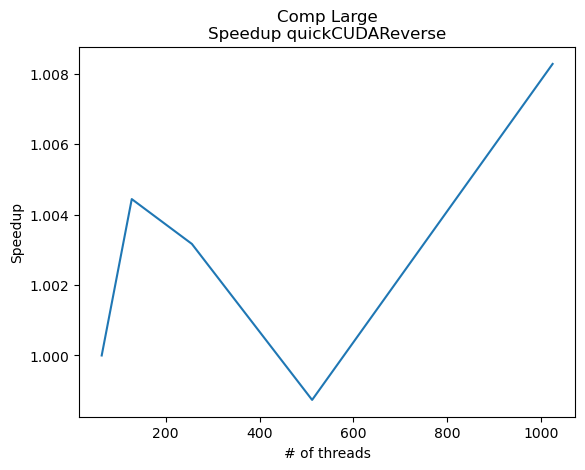

In [66]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_threads']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

# for key in algosMainCUDA.keys():
#     plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
# for key in algosCommCUDA.keys():
#     plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [76]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1,1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 1024]
    sizePerXVal = [2**16, 2**18]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_threads'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

In [ ]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

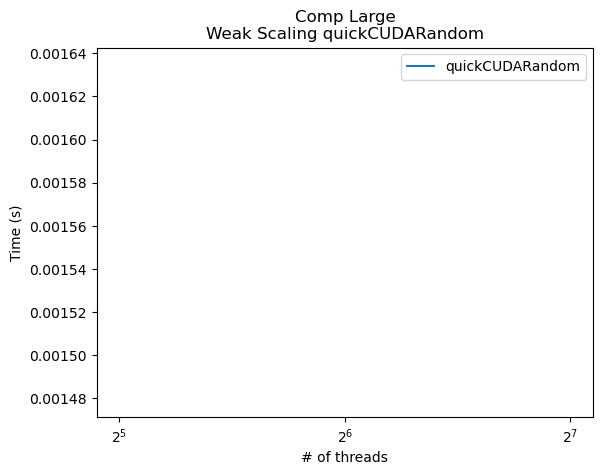

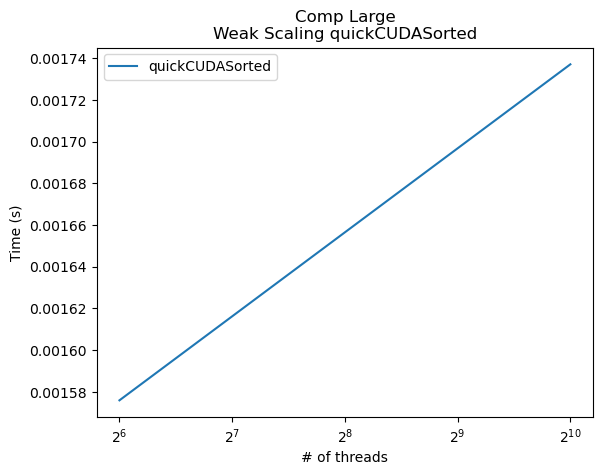

KeyError: 262144

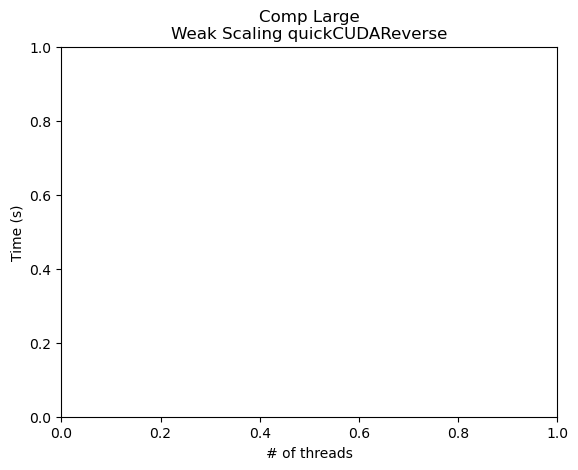

In [79]:
# for key in algosMainCUDA.keys():
#     plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

# for key in algosCommCUDA.keys():
#     plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')